In [22]:
from collections import namedtuple
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Ellipse
from astropy.io import ascii
from matplotlib import cm


In [30]:
dp_entropies = [2.8395, 1.8507, 0.4614, 3.3621, 0.1770, 0.0339, 4.3951, 2.5616, 4.4240, 5.1696, 4.6836, 5.8626, 4.4640, 5.0133, 5.8484, 2.9178, 4.1719, 4.4746, 5.5325, 2.9659, 4.5905, 2.8395, 1.8507, 2.3950, 4.4318, 1.2938, 4.4065, 4.4308, 5.5190, 3.0937, 0.0037, 1.1566, 6.1741, 1.0557, 5.0118, 2.3211, 0.1809, 0.5575, 2.6455, 4.7306, 3.8689, 2.8119, 2.8395, 1.8507, 0.0955, 0.3595, 2.4828, 3.9973, 5.6712, 2.0088, 4.1455, 4.0167, 3.7634, 4.5861, 4.1947, 5.9777, 2.7699, 4.7517, 3.4086, 2.7362, 0.8357, 4.0325, 4.1553, 2.8395, 1.8507, 0.3640, 0.1954, 0.0772, 0.0033, 4.5045, 3.3275, 4.1197, 4.1901, 4.3681, 3.2183, 5.0060, 4.0936, 3.2433, 4.1369, 5.0922, 1.1495, 4.0236, 4.4012, 2.7002, 2.8395, 1.8507, 0.0955, 0.3595, 2.4828, 1.4040, 4.5916, 4.1354, 2.2889, 4.5818, 2.1864, 0.3445, 4.9244, 3.4999, 6.5694, 4.2209, 4.6875, 5.3073, 3.6197, 3.9983, 3.5807, 3.91, 4.04, 4.15, 4.01, 3.99]
no_dp_entropies = [2.6391, 2.1763, 0.4124, 0.0112, 2.8918, 3.0504, 1.1686, 2.2396, 2.4530, 4.5595, 0.2987, 0.5190, 1.2373, 2.3714, 0.6316, 1.4109, 2.0284, 2.3258, 0.7531, 0.3822, 3.4971, 2.6391, 2.1763, 0.4124, 0.0112, 2.8918, 0.0022, 0.9339, 0.0155, 0.4522, 2.4182, 0.0023, 0.0322, 0.0928, 0.3063, 0.0001, 0.0060, 0.0000, 0.0000, 0.0000, 3.5730, 1.8365, 2.6391, 2.1763, 2.4167, 2.7186, 0.1230, 0.7449, 2.9959, 2.5143, 3.5161, 2.9938, 3.9001, 1.8959, 0.9757, 1.7681, 0.1904, 0.0001, 1.3832, 0.0000, 0.5871, 0.1248, 0.0248, 2.6391, 2.1763, 0.0132, 0.0013, 1.5695, 3.1970, 1.9968, 0.0434, 4.3401, 2.9780, 3.3254, 1.3347, 1.1997, 3.8807, 1.1616, 0.0007, 2.3706, 2.4467, 2.8198, 0.5959, 0.0784, 2.6391, 2.1763, 0.4124, 0.0112, 2.8918, 2.4675, 1.9527, 3.6438, 2.5586, 0.6299, 1.4020, 3.6306, 0.5426, 0.1970, 0.4108, 1.2496, 1.1878, 0.5379, 1.8139, 3.7968, 2.4389, 2.21, 2.32, 2.15, 2.08]


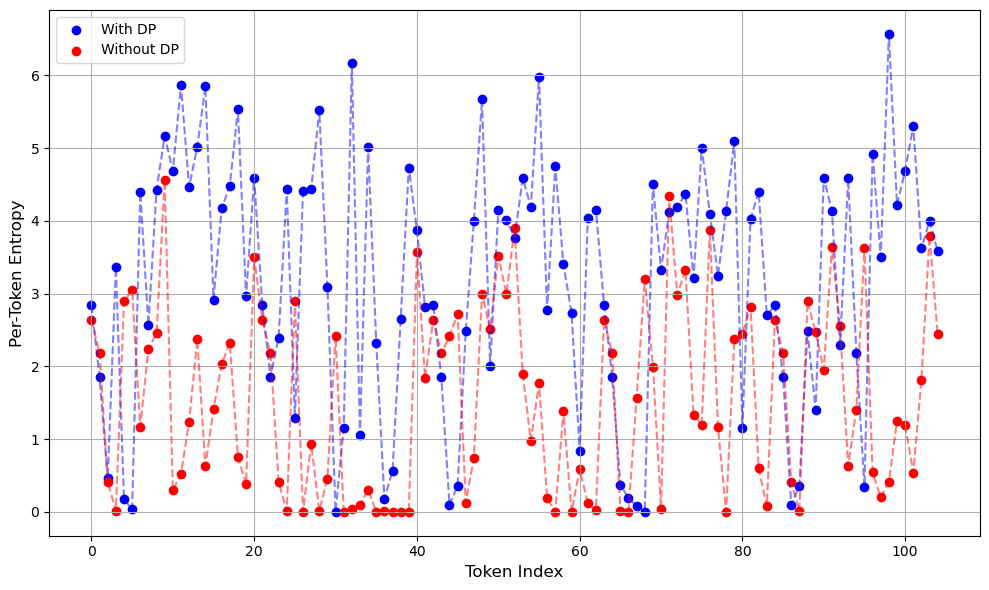

In [ ]:

indices = range(len(dp_entropies))

# Create the scatter plot and line graph
plt.figure(figsize=(10, 6))

# Plot the first dataset
plt.scatter(indices, dp_entropies, color='blue', label='With DP')
plt.plot(indices, dp_entropies, color='blue', linestyle='--', alpha=0.5)

# Plot the second dataset
plt.scatter(indices, no_dp_entropies, color='red', label='Without DP')
plt.plot(indices, no_dp_entropies, color='red', linestyle='--', alpha=0.5)

# Add labels, legend, and title
plt.xlabel('Token Index', fontsize=12)
plt.ylabel('Per-Token Entropy', fontsize=12)
# plt.title('Scatter Plot with Line Graph of Two Datasets', fontsize=14)
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()



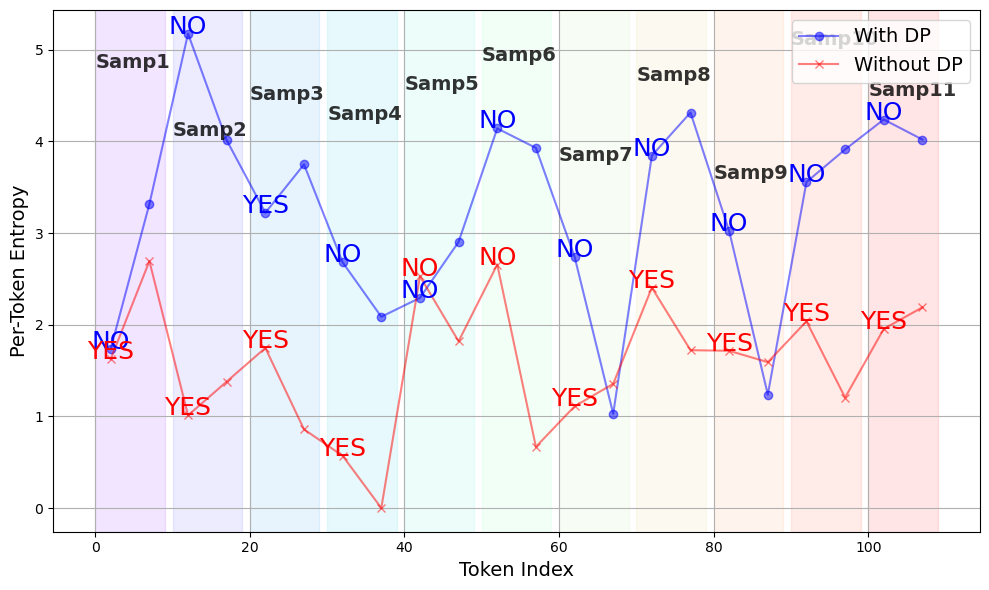

In [39]:

annotations_L1 = ["NO", "NO", "YES", "NO", "NO", "NO", "NO", "NO", "NO", "NO", "NO"]  # For L1
annotations_L2 = ["YES", "YES", "YES", "YES", "NO", "NO", "YES", "YES", "YES", "YES", "YES"]  # For L2



# Function to calculate averages over every `n` indices
def average_every_n(data, n):
    return [np.mean(data[i:i + n]) for i in range(0, len(data), n)]

# Averaged data with a window size of 5
window_size = 5
L1 = dp_entropies
L2 = no_dp_entropies
avg_L1 = average_every_n(dp_entropies, window_size)
avg_L2 = average_every_n(no_dp_entropies, window_size)

# New indices for the averaged data
avg_indices = [i + window_size // 2 for i in range(0, len(dp_entropies), window_size)]

# Plot the averaged data
plt.figure(figsize=(10, 6))

plt.plot(avg_indices, avg_L1, marker='o', color='blue', label='With DP', alpha=0.5)
plt.plot(avg_indices, avg_L2, marker='x', color='red', label='Without DP', alpha=0.5)

group_size = 10
num_groups = len(dp_entropies) // group_size + (1 if len(dp_entropies) % group_size > 0 else 0)
rainbow_colors = cm.rainbow(np.linspace(0, 1, num_groups))

# Add super light shaded regions for every 20 indices
for group in range(num_groups):
    start = group * group_size
    end = min((group + 1) * group_size, len(dp_entropies))
    color = rainbow_colors[group]
    plt.axvspan(start, end - 1, color=color, alpha=0.1)  # Super light shading

    label_x = start  # Slight offset to avoid touching the left border
    label_y = np.mean([max(L1[start:end]), max(L2[start:end])])  # Center vertically based on data range
    plt.text(label_x, label_y, f"Samp{group + 1}", fontsize=14, fontweight='bold',
             color='black', alpha=0.8, verticalalignment='center', horizontalalignment='left')




# Annotate every 5th data point for L1
step = 2
for i, annotation in zip(range(0, len(avg_L1), step), annotations_L1):
    plt.annotate(
        annotation,  # Text to display
        (avg_indices[i], avg_L1[i]),  # Coordinates of the data point
        textcoords="offset points",
        xytext=(0, 0),  # Offset the annotation above the point
        ha="center",
        fontsize=18,
        color="blue",  # Annotation color for L1
    )

# Annotate every 5th data point for L2
for i, annotation in zip(range(0, len(avg_L2), step), annotations_L2):
    plt.annotate(
        annotation,  # Text to display
        (avg_indices[i], avg_L2[i]),  # Coordinates of the data point
        textcoords="offset points",
        xytext=(0, 0),  # Offset the annotation below the point
        ha="center",
        fontsize=18,
        color="red",  # Annotation color for L2
    )


# Add labels, legend, and title
# plt.xlabel('Index (Averaged)', fontsize=12)
# plt.ylabel('Averaged Values', fontsize=12)
plt.xlabel('Token Index', fontsize=14)
plt.ylabel('Per-Token Entropy', fontsize=14)
# plt.title('Scatter Plot with Averaged Values Over 5 Indices', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()
